In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/Portfolio Optimization/data7_12.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Portfolio Optimization/data8_12.csv')
data3 = pd.read_csv('/content/drive/MyDrive/Portfolio Optimization/data9_12.csv')
data4 = pd.read_csv('/content/drive/MyDrive/Portfolio Optimization/data10_12.csv')
data5 = pd.read_csv('/content/drive/MyDrive/Portfolio Optimization/data11_12.csv')
data6 = pd.read_csv('/content/drive/MyDrive/Portfolio Optimization/data12_12.csv')

In [ ]:
print(len(data1))
print(len(data2))
print(len(data3))
print(len(data4))
print(len(data5))
print(len(data6))

2971
2971
2971
2971
2971
2971


In [ ]:
data6

,Open,Close,High,Low,Typical Price,Volume,VWAP,adl,cmf,stochastic_d,...,day,month,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7
0,15.604157,15.812675,15.861330,15.597206,15.757071,43269800,15.642971,1.295451e+08,2.151453,85.272498,...,6,7,15.379417,0.367639,15.636591,0.357892,15.277475,0.352242,15.641737,0.014529
1,15.909980,16.146301,16.257511,15.889129,16.097647,53107000,15.650249,1.505875e+08,2.075669,88.413993,...,7,7,15.604154,0.409419,15.775602,0.409683,15.499895,0.403989,15.641967,0.009505
2,15.958639,16.048998,16.125455,15.854380,16.009611,35838800,15.654090,1.662095e+08,2.047015,90.358228,...,8,7,15.761701,0.428310,15.963269,0.469178,15.675977,0.436077,15.644887,0.005868
3,15.875223,15.882174,15.972531,15.798765,15.884490,34663100,15.656447,1.648232e+08,2.081233,88.205643,...,11,7,15.824259,0.423737,16.081432,0.424299,15.780238,0.421947,15.649103,0.005105
4,15.722317,15.604156,15.791822,15.458193,15.618057,51048100,15.655877,1.584424e+08,2.069454,81.690069,...,12,7,15.914614,0.363645,16.118500,0.273145,15.847425,0.339103,15.653596,0.006453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,31.100000,31.150000,31.520000,31.080000,31.250000,25746600,30.611301,2.782126e+09,67.900500,52.066792,...,19,4,32.126667,0.386843,32.446667,0.298312,31.746668,0.260512,30.610735,0.000991
2967,30.760000,30.860001,31.250000,30.709999,30.940000,30255100,30.611401,2.768680e+09,68.470186,35.710711,...,20,4,31.826668,0.574771,32.206665,0.511859,31.543333,0.372559,30.611069,0.000870
2968,30.840000,30.299999,30.840000,30.230000,30.456666,28638900,30.611356,2.746614e+09,69.661492,19.399964,...,21,4,31.430000,0.702939,31.743334,0.599523,31.190000,0.450777,30.611279,0.000714
2969,30.129999,29.660000,30.370001,29.610001,29.880000,38732500,30.611072,2.712977e+09,71.038323,11.018889,...,24,4,30.900000,0.650659,31.203333,0.700867,30.673332,0.614023,30.611353,0.000565


In [ ]:
window_size = 50   # no.of (days) samples of historic data given as one sample for LSTMs 
period = 252       # no.of days to be considered for selling and return

In [ ]:
data1['return'] =  (data1['Close'] - data1['Open'])/data1['Open']
data2['return'] =  (data2['Close'] - data2['Open'])/data1['Open']
data3['return'] =  (data3['Close'] - data3['Open'])/data1['Open']
data4['return'] =  (data4['Close'] - data4['Open'])/data1['Open']
data5['return'] =  (data5['Close'] - data5['Open'])/data1['Open']
data6['return'] =  (data6['Close'] - data6['Open'])/data1['Open']

In [ ]:
data5

,Open,Close,High,Low,Typical Price,Volume,VWAP,adl,cmf,stochastic_d,...,month,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,return
0,16.663512,16.496181,16.692080,16.471695,16.553319,12412600,14.958060,1.169162e+07,-2.220115,95.628918,...,7,16.254034,0.469473,16.482582,0.474096,16.146563,0.471771,14.893948,0.058648,-0.003373
1,16.283966,16.455376,16.528837,16.092150,16.358788,21658800,15.001605,2.606333e+07,-1.873277,93.384001,...,7,16.409119,0.509661,16.633583,0.426541,16.274439,0.473609,14.925844,0.063416,0.003421
2,16.267641,16.467619,16.488026,16.251316,16.402320,11212200,15.023790,3.534228e+07,-1.546135,90.552335,...,7,16.447208,0.358315,16.666233,0.270845,16.264915,0.310525,14.962614,0.067756,0.004018
3,16.316608,16.218660,16.443126,16.100305,16.254030,11262800,15.043057,3.185620e+07,-1.224933,86.657909,...,7,16.405040,0.204791,16.569649,0.209238,16.271720,0.162367,14.994485,0.069443,-0.001987
4,16.239071,16.149284,16.439049,16.132959,16.240431,11748000,15.062302,2.136135e+07,-0.928941,81.482002,...,7,16.289406,0.165604,16.486664,0.177812,16.147924,0.139943,15.022818,0.068249,-0.001825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,107.690002,107.160004,107.860001,107.080002,107.366669,4617800,50.119177,8.892128e+08,185.758617,89.994938,...,4,107.913340,1.767040,108.683334,1.515913,107.380000,1.652014,50.100098,0.018656,-0.002861
2967,106.190002,107.050003,107.580002,106.190002,106.940002,4297200,50.127455,8.902330e+08,189.097414,83.962707,...,4,108.173330,1.266662,108.580000,1.052638,107.456665,1.077697,50.109715,0.019322,0.004653
2968,107.300003,108.190002,108.779999,106.660004,107.876668,4522300,50.136307,8.922382e+08,194.146432,80.229973,...,4,107.583336,1.024789,108.223335,0.885024,107.000000,0.841702,50.118946,0.019514,0.004785
2969,108.190002,109.290001,109.290001,108.040001,108.873334,5940700,50.148133,8.981789e+08,191.724328,82.384583,...,4,107.060005,0.937860,108.073330,0.711825,106.643330,0.597710,50.127647,0.019665,0.005898


In [ ]:
y1 = data1['return']
y2 = data2['return']
y3 = data3['return']
y4 = data4['return']
y5 = data5['return']
y6 = data6['return']

In [ ]:
data1.head()

,Open,Close,High,Low,Typical Price,Volume,VWAP,adl,cmf,stochastic_d,...,month,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,return
0,49.616130,49.879135,49.907569,49.580587,49.789097,5989600,49.289517,1.331588e+07,1.128914,85.969945,...,7,49.777270,0.589507,50.066340,0.491502,49.566390,0.519664,49.269497,0.017831,0.005301
1,50.106606,50.127930,50.291424,49.936007,50.118454,5695000,49.303713,1.377140e+07,1.122627,86.098995,...,7,49.699074,0.392941,49.999990,0.300268,49.526100,0.341030,49.279800,0.021516,0.000426
2,49.765433,49.708565,50.035547,49.374472,49.706195,6016400,49.310865,1.383611e+07,1.106767,85.970092,...,7,49.796215,0.248928,50.092396,0.213074,49.677746,0.230171,49.291140,0.023789,-0.001143
3,49.289159,49.260731,49.388681,48.990611,49.213341,5248800,49.309376,1.571071e+07,1.158968,80.320632,...,7,49.829390,0.176538,50.078180,0.126084,49.630356,0.180638,49.301365,0.023451,-0.000577
4,49.189639,49.054585,49.431325,48.947958,49.144623,5376300,49.306840,1.270633e+07,1.158873,69.846528,...,7,49.720398,0.250443,49.905216,0.283319,49.433697,0.292152,49.307983,0.020347,-0.002746


In [ ]:
y = pd.concat([y1,y2,y3,y4,y5,y6],axis = 1)
y

,return,return,return,return,return,return
0,0.005301,0.001722,0.012410,-0.000242,-0.003373,0.004203
1,0.000426,0.001535,-0.002880,0.000785,0.003421,0.004716
2,-0.001143,0.003891,0.019750,-0.001447,0.004018,0.001816
3,-0.000577,-0.001443,-0.011854,-0.000068,-0.001987,0.000141
4,-0.002746,0.000136,-0.001917,-0.000271,-0.001825,-0.002402
...,...,...,...,...,...,...
2966,-0.002807,0.009879,-0.005884,0.008044,-0.002861,0.000270
2967,0.002651,0.003030,0.026834,-0.017204,0.004653,0.000541
2968,-0.003118,-0.000161,0.026776,0.001505,0.004785,-0.002903
2969,-0.005362,0.001769,-0.006327,-0.011260,0.005898,-0.002520


In [ ]:
data = pd.concat([data1,data2,data3,data4,data5,data6],axis = 1)
data

,Open,Close,High,Low,Typical Price,Volume,VWAP,adl,cmf,stochastic_d,...,month,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,return
0,49.616130,49.879135,49.907569,49.580587,49.789097,5989600,49.289517,1.331588e+07,1.128914,85.969945,...,7,15.379417,0.367639,15.636591,0.357892,15.277475,0.352242,15.641737,0.014529,0.004203
1,50.106606,50.127930,50.291424,49.936007,50.118454,5695000,49.303713,1.377140e+07,1.122627,86.098995,...,7,15.604154,0.409419,15.775602,0.409683,15.499895,0.403989,15.641967,0.009505,0.004716
2,49.765433,49.708565,50.035547,49.374472,49.706195,6016400,49.310865,1.383611e+07,1.106767,85.970092,...,7,15.761701,0.428310,15.963269,0.469178,15.675977,0.436077,15.644887,0.005868,0.001816
3,49.289159,49.260731,49.388681,48.990611,49.213341,5248800,49.309376,1.571071e+07,1.158968,80.320632,...,7,15.824259,0.423737,16.081432,0.424299,15.780238,0.421947,15.649103,0.005105,0.000141
4,49.189639,49.054585,49.431325,48.947958,49.144623,5376300,49.306840,1.270633e+07,1.158873,69.846528,...,7,15.914614,0.363645,16.118500,0.273145,15.847425,0.339103,15.653596,0.006453,-0.002402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,185.240005,184.720001,185.320007,184.259995,184.766668,2209900,93.957678,6.723623e+08,190.344781,87.854964,...,4,32.126667,0.386843,32.446667,0.298312,31.746668,0.260512,30.610735,0.000991,0.000270
2967,184.839996,185.330002,186.039993,184.199997,185.189997,3868200,93.980897,6.732453e+08,191.846496,88.678155,...,4,31.826668,0.574771,32.206665,0.511859,31.543333,0.372559,30.611069,0.000870,0.000541
2968,185.990005,185.410004,186.380005,185.130005,185.640004,3781800,94.003698,6.711578e+08,194.384222,87.629125,...,4,31.430000,0.702939,31.743334,0.599523,31.190000,0.450777,30.611279,0.000714,-0.002903
2969,186.500000,185.500000,186.570007,185.020004,185.696671,3540200,94.025046,6.698102e+08,194.912813,85.752796,...,4,30.900000,0.650659,31.203333,0.700867,30.673332,0.614023,30.611353,0.000565,-0.002520


In [ ]:
data = data.values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(data)
data = sc.transform(data)

In [ ]:
data.shape

(2971, 198)

In [ ]:
y = y.values

In [ ]:
y.shape

(2971, 6)

In [ ]:
X = []
for i in range(len(data)-window_size):
  X.append(data[i:i+window_size,:])

In [ ]:
X = np.array(X)

In [ ]:
X.shape

(2921, 50, 198)

In [ ]:
y_ = y[window_size:,:]
y_.shape

(2921, 6)

In [ ]:
Y = []
for i in range(len(y_)-period):
  Y.append(y_[i:i+period,:])

In [ ]:
Y = np.array(Y)
Y.shape

(2669, 252, 6)

In [ ]:
X = X[:-period,:]
X.shape

(2669, 50, 198)

In [ ]:
X_train = X[:-252*3,:,:]
X_test = X[-252*3:,:,:]
y_train = Y[:-252*3,:,:]
y_test = Y[-252*3:,:,:]

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,Y,shuffle = False,random_state = 34,test_size = 0.3)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1913, 50, 198)
(1913, 252, 6)


In [ ]:
input_size = int(X_train.shape[2]/6)
input_size

33

In [ ]:
input1 = X_train[:,:,:input_size]
input2 = X_train[:,:,input_size:2*input_size]
input3 = X_train[:,:,2*input_size:3*input_size]
input4 = X_train[:,:,3*input_size:4*input_size]
input5 = X_train[:,:,4*input_size:5*input_size]
input6 = X_train[:,:,5*input_size:6*input_size]
output = y_train

In [ ]:
input1.shape

(1913, 50, 33)

In [ ]:
test_input1 = X_test[:,:,:input_size]
test_input2 = X_test[:,:,1*input_size:2*input_size]
test_input3 = X_test[:,:,2*input_size:3*input_size]
test_input4 = X_test[:,:,3*input_size:4*input_size]
test_input5 = X_test[:,:,4*input_size:5*input_size]
test_input6 = X_test[:,:,5*input_size:6*input_size]

In [ ]:
test_input1.shape

(756, 50, 33)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Input,BatchNormalization,Dropout, LSTM
from keras.models import Sequential

In [ ]:
input_size = input1.shape[1:]

In [ ]:
input_size

(50, 33)

In [ ]:
def single_model(input):
  x = LSTM(units =128,return_sequences=True,activation = 'tanh')(input)
  x = LSTM(units =128,return_sequences=True,activation = 'tanh')(x)
  x = Dropout(0.2)(x)
  x = BatchNormalization()(x)
  
  x = LSTM(units=64,return_sequences=True,activation = 'tanh')(x)
  x = LSTM(units=64,return_sequences=True,activation = 'tanh')(x)
  #x = Dropout(0.2)(x)
  x = BatchNormalization()(x)

  x = LSTM(units=32,return_sequences=True,activation = 'tanh')(x)
  x = LSTM(units=32,return_sequences=True,activation = 'tanh')(x)
  #x = Dropout(0.2)(x)
  x = BatchNormalization()(x)

  x = LSTM(units=4,activation = 'tanh',return_sequences = True)(x)
  x = LSTM(units=4,activation = 'tanh')(x)
  #x = Dropout(0.2)(x)
  x = BatchNormalization()(x)

  x = Dense(units=1,activation = 'linear')(x)
  return x

In [ ]:
def create_model():
  input1 = keras.Input(shape = input_size)
  input2 = keras.Input(shape = input_size)
  input3 = keras.Input(shape = input_size)
  input4 = keras.Input(shape = input_size)
  input5 = keras.Input(shape = input_size)
  input6 = keras.Input(shape = input_size)
  x1 = single_model(input1)
  x2 = single_model(input2)
  x3 = single_model(input3)
  x4 = single_model(input4)
  x5 = single_model(input5)
  x6 = single_model(input6)
  y = tf.keras.layers.Concatenate()([x1,x2,x3,x4,x5,x6])
  y = Dense(48,activation = 'linear')(y)
  y = Dropout(0.2)(y)
  y = Dense(24,activation = 'linear')(y)
  y = Dense(12,activation = 'linear')(y)
  y = Dense(6,activation = 'softmax')(y)
  #print(y)
  model = tf.keras.models.Model(inputs = [input1,input2,input3,input4,input5,input6],outputs = [y])
  return model

In [ ]:
model = create_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 33)]     0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 50, 33)]     0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 50, 33)]     0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 50, 33)]     0           []                               
                                                                                              

In [ ]:
from keras.utils import plot_model

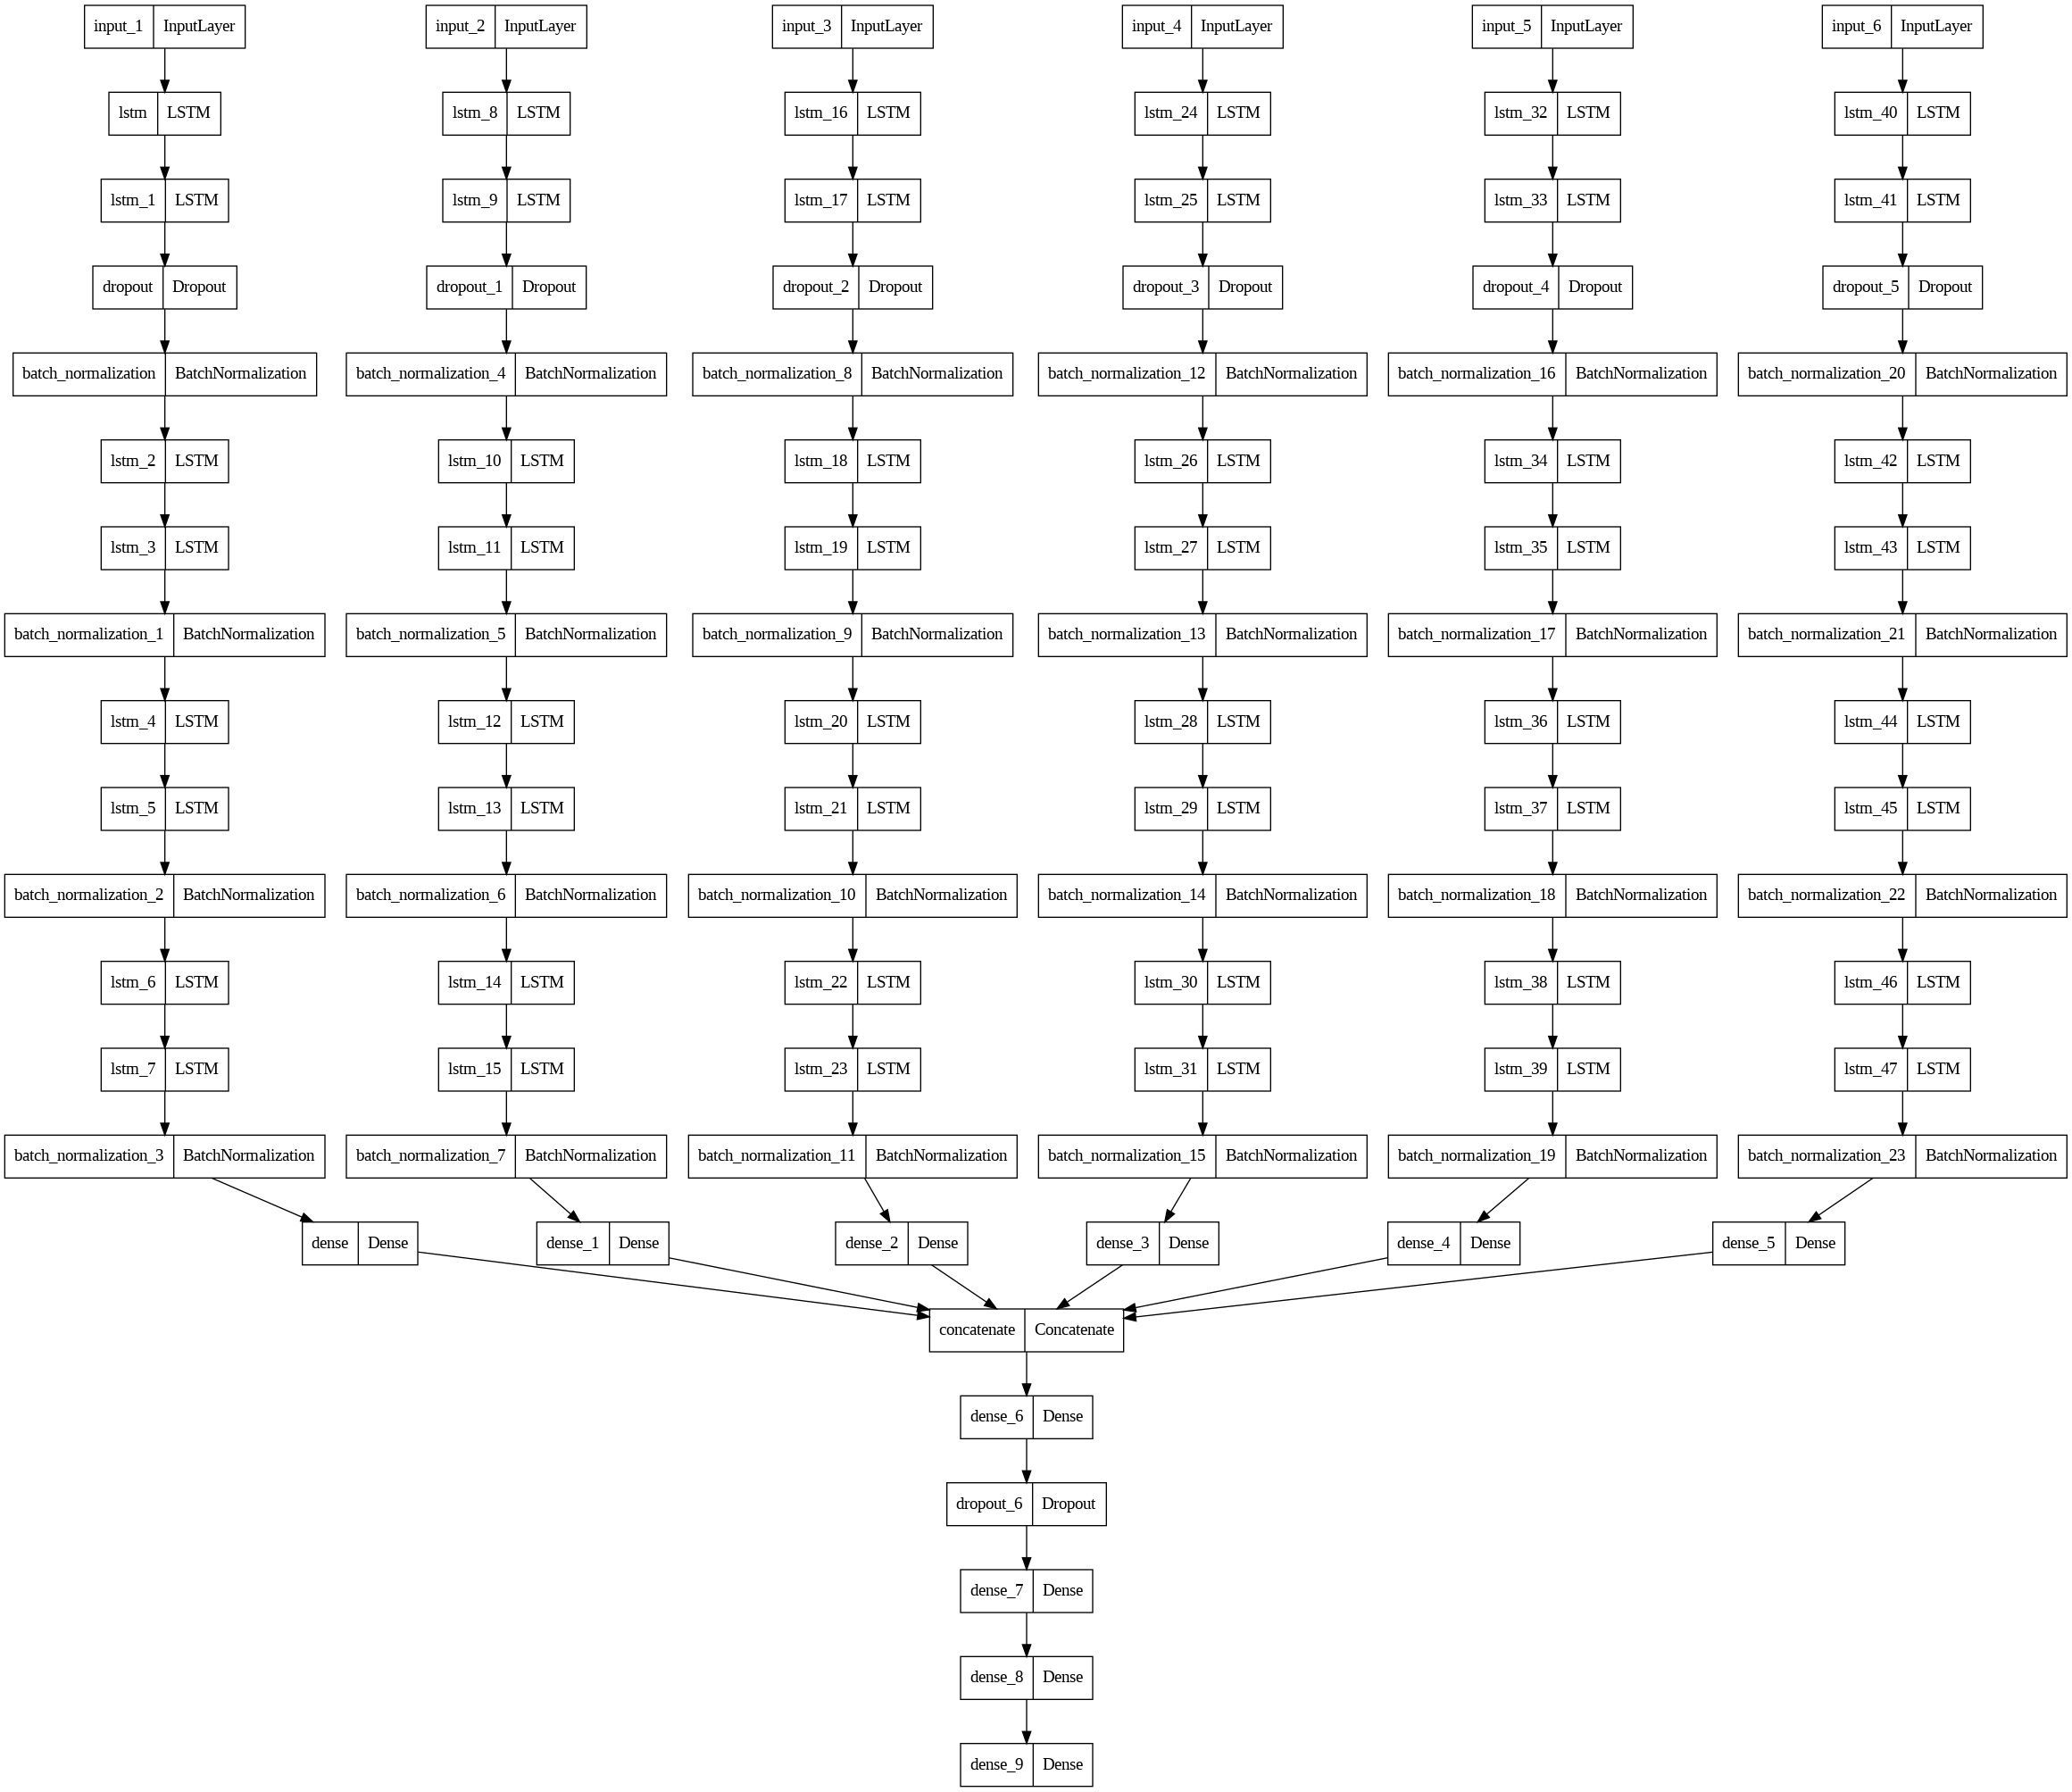

In [ ]:
plot_model(model)

In [ ]:
import tensorflow
from tensorflow import keras
from keras import backend as K

In [ ]:
print(input1.shape)
print(y_train.shape)

(1913, 50, 33)
(1913, 252, 6)


In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
rlr = ReduceLROnPlateau(patience = 20)
mcp = ModelCheckpoint(monitor = 'val_loss',filepath = '/content/drive/MyDrive/Portfolio Optimization/Models/lstm_diverse_12y_next_to_1_0086.h5',save_best_only = True)

In [ ]:
def annual_mean_sharpe_ratio(y_true,y_pred):
  #print(y_pred)
  #print(y_true)
  y_true = tf.cast(y_true,tf.float64)
  y_pred = tf.cast(y_pred,tf.float64)
  y_pred = tf.reshape(y_pred,(-1,1,6))
  r = y_true*y_pred
  returns = K.sum(r,axis = 2)
  mean_return = K.mean(returns,axis = 1)
  std_return = K.std(returns,axis = 1)
  z = K.mean(15.87*mean_return/std_return)
  return K.exp(-z)

In [ ]:
def amsr(y_true,y_pred):
  #print(y_pred)
  y_true = tf.cast(y_true,tf.float64)
  y_pred = tf.cast(y_pred,tf.float64)
  y_pred = tf.reshape(y_pred,(-1,1,6))
  r = y_true*y_pred
  returns = K.sum(r,axis = 2)
  mean_return = K.mean(returns,axis = 1)
  std_return = K.std(returns,axis = 1)
  z = K.mean(15.87*mean_return/std_return)
  return z

In [ ]:
model.compile(optimizer = 'adam',loss = annual_mean_sharpe_ratio, metrics = amsr)

In [ ]:
history = model.fit([input1,input2,input3,input4,input5,input6],
          output,epochs = 100,
          validation_data = ([test_input1,test_input2,test_input3,test_input4,test_input5,test_input6],y_test),
          callbacks = [mcp],batch_size = 32)

Epoch 1/100
60/60 [==============================] - 10s 170ms/step - loss: 0.1497 - amsr: 1.9097 - val_loss: 0.7044 - val_amsr: 0.5800
Epoch 2/100
60/60 [==============================] - 10s 171ms/step - loss: 0.1502 - amsr: 1.9056 - val_loss: 0.6502 - val_amsr: 0.6826
Epoch 3/100
60/60 [==============================] - 9s 152ms/step - loss: 0.1493 - amsr: 1.9087 - val_loss: 0.5153 - val_amsr: 0.8702
Epoch 4/100
60/60 [==============================] - 9s 159ms/step - loss: 0.1498 - amsr: 1.9105 - val_loss: 0.5505 - val_amsr: 0.7869
Epoch 5/100
60/60 [==============================] - 10s 163ms/step - loss: 0.1503 - amsr: 1.9077 - val_loss: 0.9308 - val_amsr: 0.4081
Epoch 6/100
60/60 [==============================] - 8s 139ms/step - loss: 0.1503 - amsr: 1.9038 - val_loss: 0.7694 - val_amsr: 0.5400
Epoch 7/100
60/60 [==============================] - 10s 171ms/step - loss: 0.1526 - amsr: 1.8901 - val_loss: 0.5089 - val_amsr: 0.8888
Epoch 8/100
60/60 [==============================] 

In [ ]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'amsr', 'val_loss', 'val_amsr'])


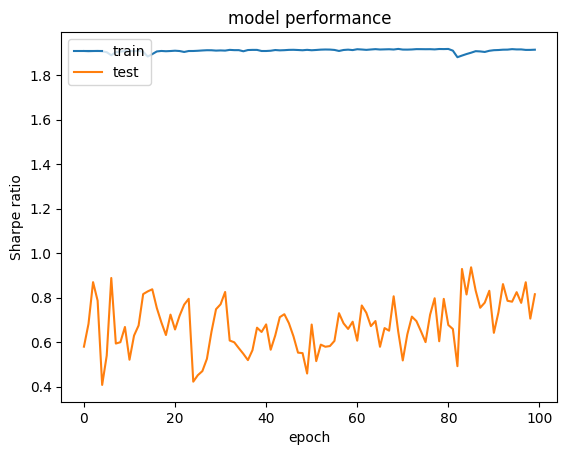

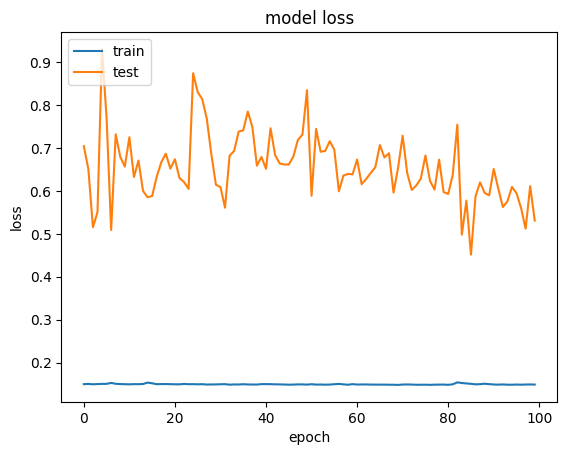

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['amsr'])
plt.plot(history.history['val_amsr'])
plt.title('model performance')
plt.ylabel('Sharpe ratio')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'amsr', 'val_loss', 'val_amsr'])


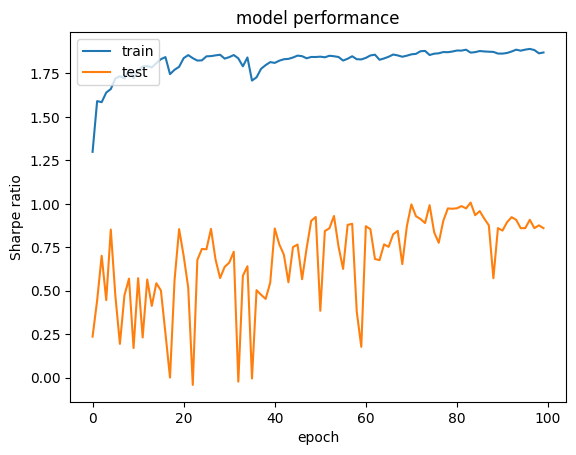

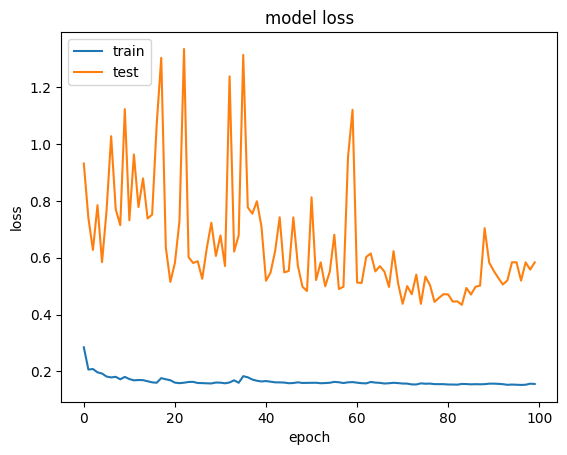

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['amsr'])
plt.plot(history.history['val_amsr'])
plt.title('model performance')
plt.ylabel('Sharpe ratio')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#from keras.models import load_model
model.load_weights(filepath = '/content/drive/MyDrive/Portfolio Optimization/Models/lstm_diverse_12y_next_to_greater_than_1.h5')
#model.load_weights(filepath = '/content/drive/MyDrive/Portfolio Optimization/Models/lstm_diverse_12y.h5')

In [ ]:
model.evaluate([input1,input2,input3,input4,input5,input6],output)

60/60 [==============================] - 3s 42ms/step - loss: 0.1984 - amsr: 1.8894


[0.19839638471603394, 1.8894158601760864]

In [ ]:
model.evaluate([test_input1,test_input2,test_input3,test_input4,test_input5,test_input6],y_test)

24/24 [==============================] - 1s 41ms/step - loss: 0.4342 - amsr: 1.0073


[0.43418779969215393, 1.007344365119934]

In [ ]:
model.predict([input1,input2,input3,input4,input5,input6])

60/60 [==============================] - 18s 57ms/step


array([[6.5774661e-01, 3.6430716e-05, 2.1781533e-03, 2.4291199e-05,
        2.1922780e-07, 3.4001431e-01],
       [6.2769008e-01, 3.2930362e-05, 1.9387798e-03, 2.1680678e-05,
        1.9881652e-07, 3.7031633e-01],
       [6.0749924e-01, 3.0974683e-05, 1.8174563e-03, 2.0739430e-05,
        1.9635733e-07, 3.9063138e-01],
       ...,
       [4.3393625e-04, 9.9347669e-01, 2.1005248e-07, 1.0488700e-08,
        8.9610076e-06, 6.0801571e-03],
       [2.3924734e-04, 9.9633706e-01, 9.4422411e-08, 3.5660173e-09,
        3.0455999e-06, 3.4206326e-03],
       [9.7445023e-05, 9.9853826e-01, 2.8375364e-08, 7.2161321e-10,
        6.7390778e-07, 1.3635447e-03]], dtype=float32)